In [ ]:
# Дипломная работа. Ольга Губанова

In [217]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [218]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [219]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [220]:
# 1. Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('HR.csv')
len(df.left[ df.left == 0 ])

11428

In [221]:
# 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [222]:
# Модальные значения данных
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [223]:
# Медианные значения данных
df.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

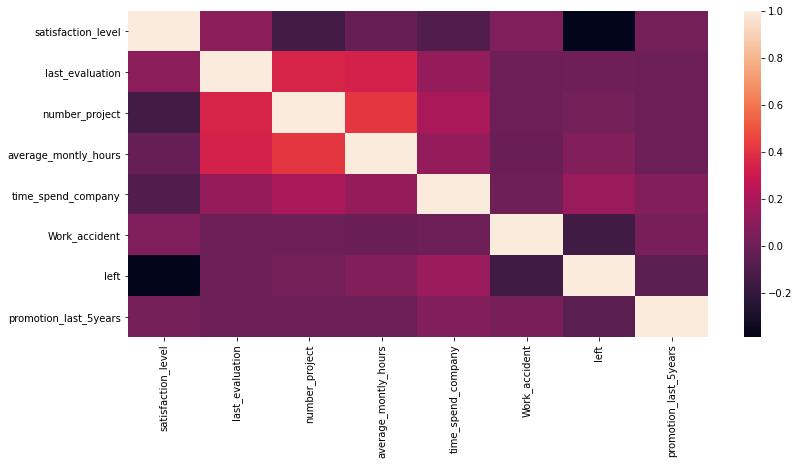

In [224]:
# 3. Корреляционная матрица

numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years']
df_num = df[numeric_columns]
corr_val = df_num.corr()
sns.heatmap(corr_val)

In [225]:
corr_val

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [226]:
# Две наименее скоррелированные величины с корреляциями: 
#     1) 'satisfaction_level' и 'left' -0.0.388375
#     2) 'Work_accident' и 'left' -0.154622
# Две самые скоррелированные величины с корреляциями: 
#     1) 'average_montly_hours' и 'number_project' corr = 0.417211
#     2) 'number_project' и 'last_evaluation' corr = 0.349333
corr_val.left.sort_values()

satisfaction_level      -0.388375
Work_accident           -0.154622
promotion_last_5years   -0.061788
last_evaluation          0.006567
number_project           0.023787
average_montly_hours     0.071287
time_spend_company       0.144822
left                     1.000000
Name: left, dtype: float64

In [227]:
# 4. Рассчитайте сколько сотрудников работает в каждом департаменте

df_by_department = df.groupby('department').count()
df_by_department.satisfaction_level

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: satisfaction_level, dtype: int64

In [229]:
# 5. Показать распределение сотрудников по зарплатам
df_by_salary = df.groupby('salary').satisfaction_level.count()
df_by_salary

salary
high      1237
low       7316
medium    6446
Name: satisfaction_level, dtype: int64

Text(0, 0.5, 'Количество чел., тыс.')

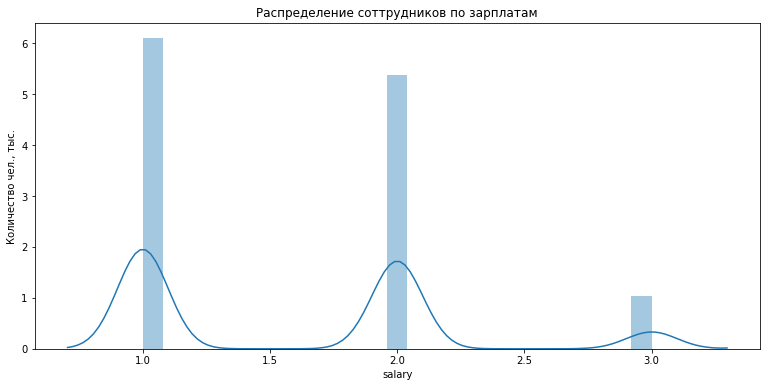

In [40]:
df1 = pd.DataFrame(df.salary)

df1.salary.replace('low', 1, inplace=True)
df1.salary.replace('medium', 2, inplace=True)
df1.salary.replace('high', 3, inplace=True)
df1.tail()
ax = sns.distplot(df1.salary)
ax.set_title('Распределение соттрудников по зарплатам')
ax.set_ylabel('Количество чел., тыс.')

In [41]:
columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary']

In [42]:
# 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
df_salary_by_department = df.pivot_table(index = 'salary', columns = 'department', values = 'average_montly_hours', aggfunc = 'count', fill_value = 0)
df_salary_by_department

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


In [237]:
# 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе 
#    больше времени, чем сотрудники с низким окладом
# Нулевая гипотеза H0: значение 'average_montly_hours' для работников с низкой 'low' 
# и высокой 'high' зарплатой не отличаются
# Альтернативная гипотеза H1: значение 'average_montly_hours' для работников с низкой 'low' 
# и высокой 'high' зарплатой отличаются
# Предположим, что уровень значимости alpha=0.05, 
# то есть если p-value p < 0.05 мы можем отвергнуть H0


from scipy import stats

# df2 = df.pivot_table(index='department', columns = 'salary', values = 'average_montly_hours', aggfunc = 'sum', fill_value = 0)
df_by_salary = df.groupby('salary')
df_by_salary.head()

df3 = df[ df.salary == 'high']
df_high_salary = pd.DataFrame(df3.average_montly_hours)
df_high_salary.head()

,average_montly_hours
72,149
111,289
189,156
267,129
306,149


In [246]:
df_high_salary.mean()

average_montly_hours    199.867421
dtype: float64

In [247]:
len(df_high_salary)

1237

In [248]:
df4 = df[ df.salary == 'low']
df_low_salary = pd.DataFrame(df4.average_montly_hours)
df_low_salary.head()

,average_montly_hours
0,157
3,223
4,159
5,153
6,247


In [249]:
len(df_low_salary)

7316

In [242]:
t, p = stats.ttest_ind(df_high_salary, df_low_salary, equal_var = False)

In [244]:
# Величина p-value=0.4446 > уровня значимости alpha=0.05. Следовательно, мы принимаем нулевую гишпотезу H0,
# и делаем вывод о том, что сотрудники с высоким окладом НЕ проводят на работе 
#    больше времени, чем сотрудники с низким окладом
p

array([0.44590455])

In [49]:
# То же самое можно посчитать руками:
df_high_salary.describe()

,average_montly_hours
count,1237.000000
mean,199.867421
std,47.710446
min,96.000000
25%,161.000000
50%,199.000000
75%,241.000000
max,307.000000


In [50]:
df_low_salary.describe()

,average_montly_hours
count,7316.000000
mean,200.996583
std,50.832214
min,96.000000
25%,155.000000
50%,199.000000
75%,246.000000
max,310.000000


In [250]:
high_mean = 199.867421
low_mean = 200.996583
high_std = 47.710446
low_std = 50.832214
N1 = len(df_high_salary)
N2 = len(df_low_salary)

# Посчитаем t-value, чтобы принять или опровергнуть нулевую гипотезу H0
t_value = (high_mean - low_mean)/ np.sqrt(high_std*high_std/N1 + low_std*low_std/N2)
t_value
# t_value < t_0.95=1.6461 для alpha=0.05 для набора данных > 1000

-0.7624333962190583

In [251]:
# 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
#     -- Доля сотрудников с повышением за последние 5 лет
#     -- Средняя степень удовлетворенности
#     -- Среднее количество проектов

df_projects_by_satisfaction_level = df.pivot_table(index = 'satisfaction_level', columns = 'left', values = 'number_project', aggfunc = 'count', fill_value = 0)
df_projects_by_satisfaction_level.head()

left,0,1
satisfaction_level,,
0.09,0,195
0.10,0,358
0.11,0,335
0.12,26,4
0.13,51,3


In [252]:
# среднее количество проектов для неуволившихся сотрудников
mean_proj_stayed = df_projects_by_satisfaction_level[0].mean()
round(mean_proj_stayed, 2)

124.22

In [253]:
# среднее количество проектов для уволившихся сотрудников
mean_proj_left = df_projects_by_satisfaction_level[1].mean()
round(mean_proj_left, 2)

38.82

In [57]:
df_projects_by_satisfaction_level.reset_index().head()

left,satisfaction_level,0,1
0,0.09,0,195
1,0.10,0,358
2,0.11,0,335
3,0.12,26,4
4,0.13,51,3


In [58]:
df_left_by_promotion = df.pivot_table(index = 'promotion_last_5years', columns = 'left', values = 'satisfaction_level', aggfunc = 'count', fill_value = 0)
df_left_by_promotion

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


In [60]:
# Доля сотрудников с повышением за последние 5 лет для уволившихся сотрудников
num_prom_stayed = df_left_by_promotion.iloc[1, 1]
num_prom_stayed

19

In [61]:
# Доля сотрудников без повышения за последние 5 лет для неуволившихся сотрудников
num_prom_left = df_left_by_promotion.iloc[0, 0]
num_prom_left

11128

In [241]:
# df.groupby('left').count().reset_index().head()

In [ ]:
# 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, 
#    предсказывающую уволился ли сотрудник на основе имеющихся факторов 
#   (кроме department и salary)Оценить качество модели на тестовой выборкe

In [180]:
# загружаем данные в датафрейм

# выберем три параметра, у которых отрицательная корреляция с категориальной величиной 'left' 
columns_lda = ['satisfaction_level', 'last_evaluation', 'promotion_last_5years']
df_lda = df[columns_lda]

# data = pd.DataFrame(df_lda, columns_lda)
data_class = df.left

In [181]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_lda, data_class, test_size=0.25)

In [182]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [183]:
lda = LinearDiscriminantAnalysis()

In [184]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [185]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [200]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

In [201]:
result

,left,Unnamed 0
12028,1.0,NaN
8550,0.0,NaN
2996,0.0,0.0
1349,1.0,0.0
3693,0.0,1.0
...,...,...
3337,0.0,0.0
12614,1.0,NaN
792,1.0,0.0
7722,0.0,NaN


In [202]:
# рассчет точности - отношение верный прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов b
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [203]:
accuracy_score(y_test, lda.predict(X_test))

0.7717333333333334

In [204]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.29114159,  0.74226708, -0.9809524 ]])

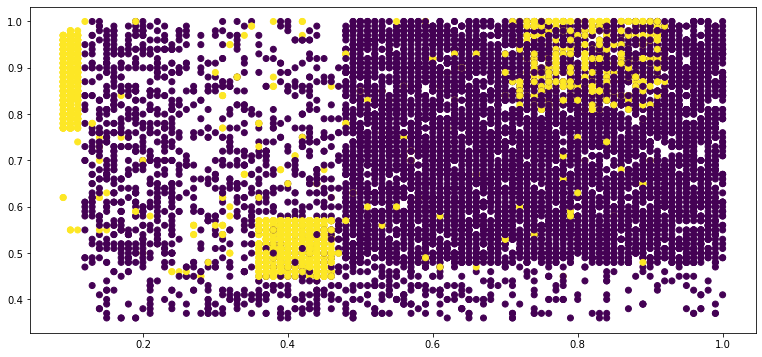

In [191]:
# визуализируем дискриминантную линию только по 2 признакам
# plt.scatter(X_train['satisfaction_level'], X_train['promotion_last_5years'], c=y_train)
plt.scatter(X_train['satisfaction_level'], X_train['last_evaluation'], c=y_train)
plt.show()

In [192]:
small_train = X_train[(y_train == 0) | (y_train == 1)]
small_train = small_train[['satisfaction_level', 'last_evaluation']]
sy_train = y_train[(y_train == 0) | (y_train == 1)]
small_test = X_test[(y_test == 0) | (y_test == 1)]
small_test = small_test[['satisfaction_level', 'last_evaluation']]
sy_test = y_test[(y_test == 0) | (y_test == 1)]

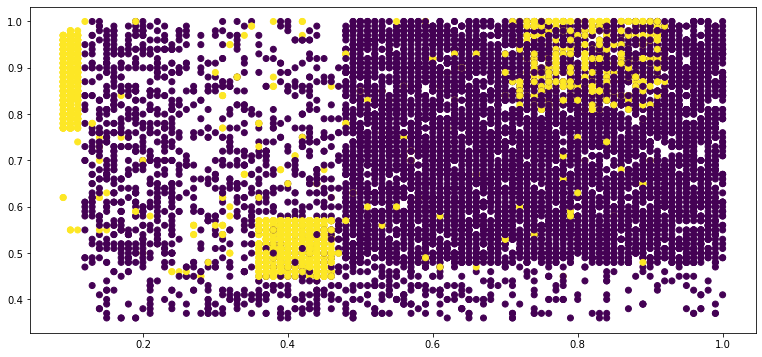

In [193]:
plt.scatter(small_train['satisfaction_level'], small_train['last_evaluation'], c=sy_train)
plt.show()

In [194]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [195]:
# посмотрим на наши центроиды
lda_small.means_

array([[0.66570629, 0.71591275],
       [0.4420852 , 0.71933857]])

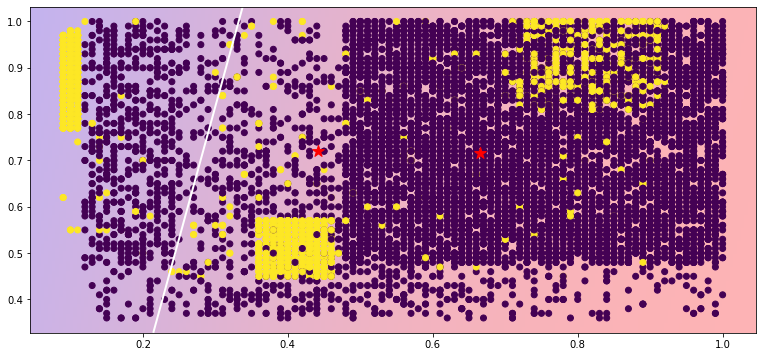

In [197]:
# сам scatter plot
plt.scatter(small_train['satisfaction_level'], small_train['last_evaluation'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [ ]:
# как видно из визуалиации, алгоритм не полностью классифицирует предсказываемуюю переменную 'left'
# центроиды для обеих значений переменнойй 'left' находятся справа от дискриминационной прямой
# в правой области также находится довольно много противоположных значений переменно

In [198]:
# второй признак по абсолютному значению в 5 раз больше первого признака
lda_small.coef_

array([[-4.29230405,  0.75251213]])

In [199]:
# кросс-валидация модели
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(lda, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))   


0.7694222222222221


In [139]:
# теперь выберем больше параметров
columns_lda = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']

df_lda = df[columns_lda]
data_class = df.left

In [140]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_lda, data_class, test_size=0.25)

In [141]:
lda1 = LinearDiscriminantAnalysis()

In [142]:
# обучаем данные
lda1.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [144]:
# делаем прогноз на тестовой выборке
lda1.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
# смотрим разницу факта и прогноза
result1 = pd.DataFrame([y_test, lda1.predict(X_test)]).T

In [147]:
result1

,left,Unnamed 0
13201,0.0,NaN
11792,0.0,NaN
14776,1.0,NaN
11888,0.0,NaN
14041,0.0,NaN
...,...,...
9952,0.0,NaN
5813,0.0,NaN
8234,0.0,NaN
8318,0.0,NaN


In [149]:
# рассчитаем точность предсказания модели, видим неольшое улучшение
accuracy_score(y_test, lda1.predict(X_test))

0.768

In [150]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.51483455,  0.70723456, -0.97242507]])

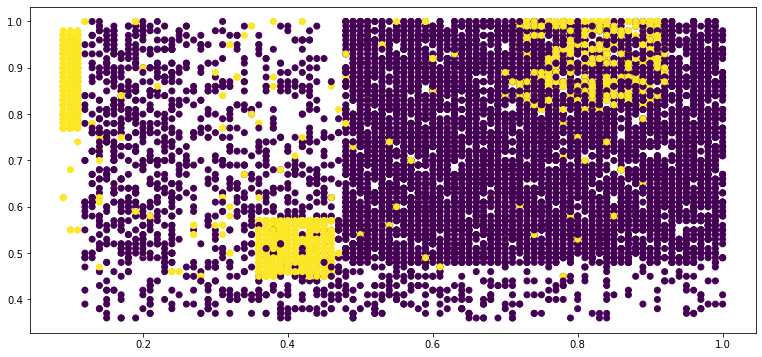

In [151]:
# визуализируем дискриминантную линию только по 2 признакам
# plt.scatter(X_train['satisfaction_level'], X_train['promotion_last_5years'], c=y_train)
plt.scatter(X_train['satisfaction_level'], X_train['last_evaluation'], c=y_train)
plt.show()

In [152]:
small_train = X_train[(y_train == 0) | (y_train == 1)]
small_train = small_train[['satisfaction_level', 'last_evaluation']]
sy_train = y_train[(y_train == 0) | (y_train == 1)]
small_test = X_test[(y_test == 0) | (y_test == 1)]
small_test = small_test[['satisfaction_level', 'last_evaluation']]
sy_test = y_test[(y_test == 0) | (y_test == 1)]

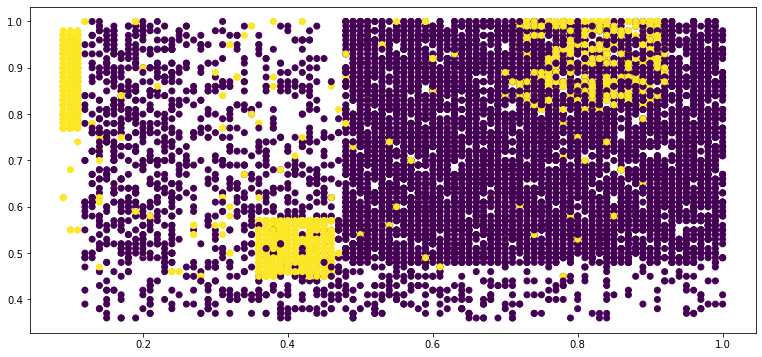

In [153]:
plt.scatter(small_train['satisfaction_level'], small_train['last_evaluation'], c=sy_train)
plt.show()

In [154]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)


LinearDiscriminantAnalysis()

In [155]:
# посмотрим на наши центроиды
lda_small.means_

array([[0.66510019, 0.71583178],
       [0.44167355, 0.71903189]])

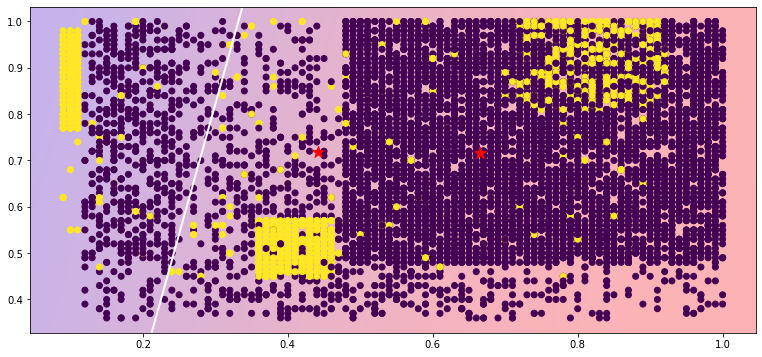

In [156]:
# сам scatter plot
plt.scatter(small_train['satisfaction_level'], small_train['last_evaluation'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [157]:
# второй признак по абсолютному значению в 5 раз больше первого признака
lda_small.coef_

array([[-4.30096131,  0.76605048]])

In [159]:
# кросс-валидация модели
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(lda1, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores)) 

0.7636444444444446
